<a href="https://colab.research.google.com/github/srilalithaveerubhotla/CNN-BASICS/blob/master/VGG16_CIFAR100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.layers import Conv2D, MaxPool2D
from keras.utils import plot_model
import keras
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten

Using TensorFlow backend.


In [0]:
# load train and test dataset
def load_dataset():
  # load dataset
	(trainX, trainY), (testX, testY) = keras.datasets.cifar100.load_data()
	# one hot encode target values
	trainY = keras.utils.to_categorical(trainY)
	testY = keras.utils.to_categorical(testY)
	return trainX, trainY, testX, testY

In [3]:
X_train,y_train,X_test,y_test=load_dataset()

169009152/169001437 [==============================] - 2s 0us/step


In [4]:
print('Train: X=%s, y=%s' % (X_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (X_test.shape, y_test.shape))

Train: X=(50000, 32, 32, 3), y=(50000, 100)
Test: X=(10000, 32, 32, 3), y=(10000, 100)


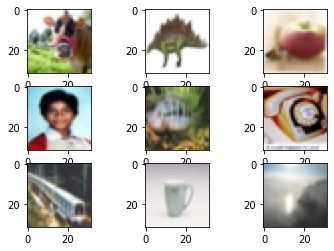

In [5]:
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
	pyplot.imshow(X_train[i], cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0 
X_test = X_test / 255.0

In [7]:


input_shape = (32, 32, 3) 


model = Sequential(name='vgg16-sequential')

# (block1)
model.add(Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=input_shape, name='block1_conv1'))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu', name='block1_conv2'))
model.add(MaxPool2D((2, 2), strides=(2, 2), name='block1_pool'))

#  (block2)
model.add(Conv2D(128, (3, 3), padding='same', activation='relu', name='block2_conv1'))
model.add(Conv2D(128, (3, 3), padding='same', activation='relu', name='block2_conv2'))
model.add(MaxPool2D((2, 2), strides=(2, 2), name='block2_pool'))

# (block3)
model.add(Conv2D(256, (3, 3), padding='same', activation='relu', name='block3_conv1'))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu', name='block3_conv2'))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu', name='block3_conv3'))
model.add(MaxPool2D((2, 2), strides=(2, 2), name='block3_pool'))

#(block4)
model.add(Conv2D(512, (3, 3), padding='same', activation='relu', name='block4_conv1'))
model.add(Conv2D(512, (3, 3), padding='same', activation='relu', name='block4_conv2'))
model.add(Conv2D(512, (3, 3), padding='same', activation='relu', name='block4_conv3'))
model.add(MaxPool2D((2, 2), strides=(2, 2), name='block4_pool'))

# (block5)
model.add(Conv2D(512, (3, 3), padding='same', activation='relu', name='block5_conv1'))
model.add(Conv2D(512, (3, 3), padding='same', activation='relu', name='block5_conv2'))
model.add(Conv2D(512, (3, 3), padding='same', activation='relu', name='block5_conv3'))
model.add(MaxPool2D((2, 2), strides=(2, 2), name='block5_pool'))


model.add(Flatten(name='flatten'))
model.add(Dense(4096, activation='relu', name='fc1'))
model.add(Dense(4096, activation='relu', name='fc2'))
model.add(Dense(100, activation='softmax', name='predictions'))


model.summary()


Model: "vgg16-sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 8, 8, 256)    

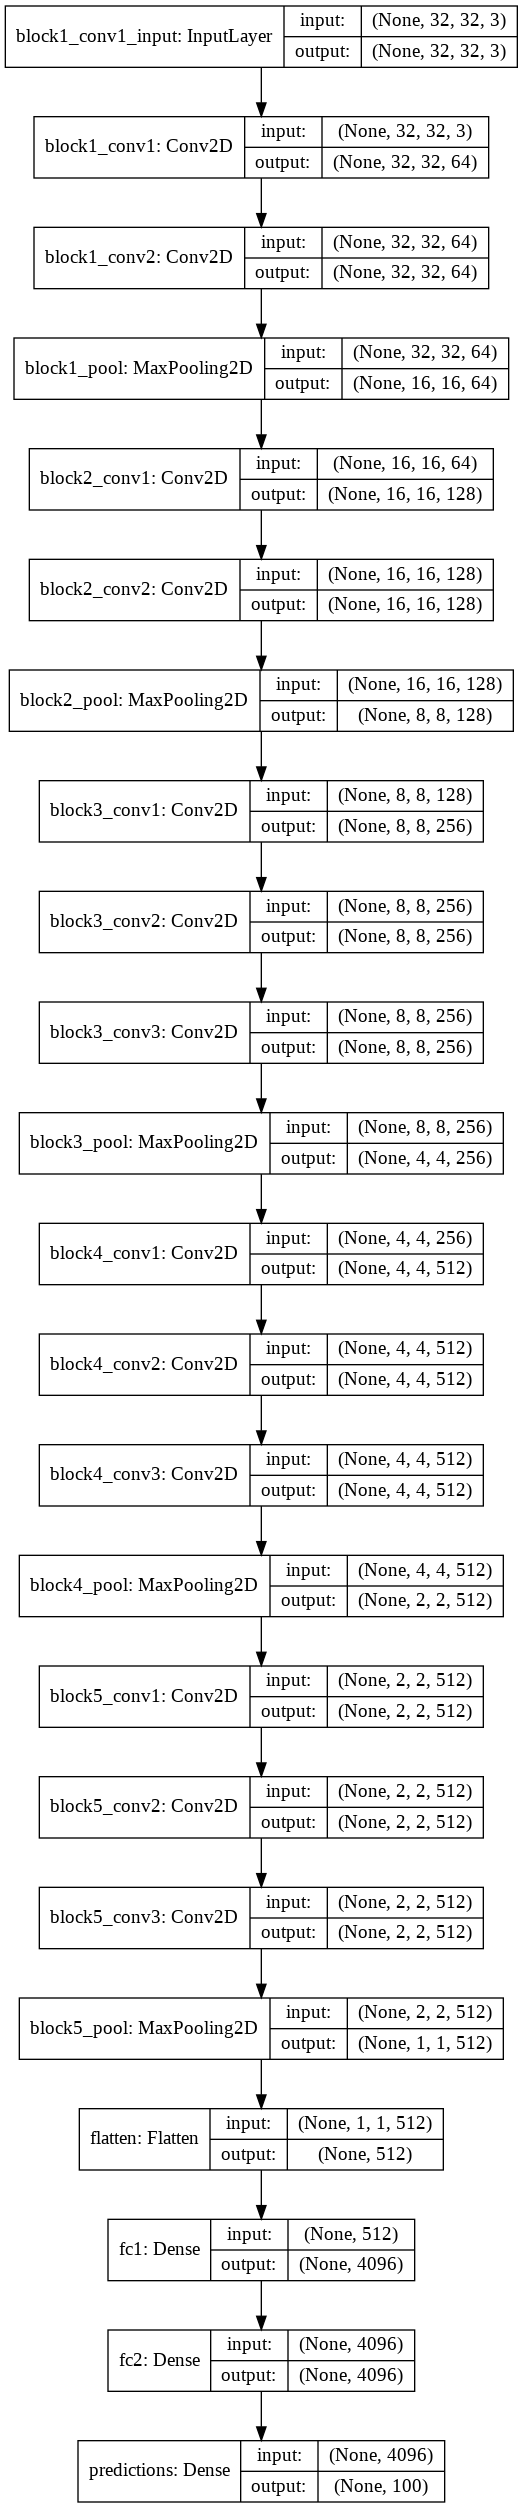

In [8]:
keras.utils.plot_model(model, "my_cifar_vgg.png", show_shapes=True)

In [0]:
model.compile(loss="binary_crossentropy",
              optimizer='adam',
              metrics=["accuracy",'mse'])


In [0]:

X_valid = X_train[:5000]
y_valid = y_train[:5000]

In [11]:
model.fit(X_train, y_train, epochs=1,
          validation_data=(X_valid, y_valid))

Train on 50000 samples, validate on 5000 samples
Epoch 1/1
50000/50000 [==============================] - 4872s 97ms/step - loss: 0.0560 - accuracy: 0.9900 - mse: 0.0099 - val_loss: 0.0560 - val_accuracy: 0.9900 - val_mse: 0.0099
